# Importing Packages

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix,roc_curve,accuracy_score,classification_report
import os
os.environ["PATH"] += os.pathsep + "/usr/local/bin" 
from sklearn.preprocessing import OrdinalEncoder as oe
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.model_selection import train_test_split as tts

# Importing Data Sets

In [288]:
data=pd.read_csv('drug.csv')

In [289]:
data.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


# Exploratory data analysis

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [290]:
data.describe().T.style.background_gradient(cmap = "viridis")

,count,mean,std,min,25%,50%,75%,max
Age,200.000000,44.315000,16.544315,15.000000,31.000000,45.000000,58.000000,74.000000
Na_to_K,200.000000,16.084485,7.223956,6.269000,10.445500,13.936500,19.380000,38.247000


In [24]:
data.shape

(200, 6)

In [25]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [26]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [103]:
df['Na_to_K'].unique()

array([25.355, 13.093, 10.114,  7.798, 18.043,  8.607, 16.275, 11.037,
       15.171, 19.368, 11.767, 19.199, 15.376, 20.942, 12.703, 15.516,
       11.455, 13.972,  7.298, 25.974, 19.128, 25.917, 30.568, 15.036,
       33.486, 18.809, 30.366,  9.381, 22.697, 17.951,  8.75 ,  9.567,
       11.014, 31.876, 14.133,  7.285,  9.445, 13.938,  9.709,  9.084,
       19.221, 14.239, 15.79 , 12.26 , 12.295,  8.107, 13.091, 10.291,
       31.686, 19.796, 19.416, 10.898, 27.183, 18.457, 10.189, 14.16 ,
       11.34 , 27.826, 10.091, 18.703, 29.875,  9.475, 20.693,  8.37 ,
       13.303, 27.05 , 12.856, 10.832, 24.658, 24.276, 13.967, 19.675,
       10.605, 22.905, 17.069, 20.909, 11.198, 19.161, 13.313, 10.84 ,
       13.934,  7.761,  9.712, 11.326, 10.067, 13.935, 13.597, 15.478,
       23.091, 17.211, 16.594, 15.156, 29.45 , 29.271, 15.015, 11.424,
       38.247, 25.395, 35.639, 16.725, 11.871, 12.854, 13.127,  8.966,
       28.294,  8.968, 11.953, 20.013,  9.677, 16.85 ,  7.49 ,  6.683,
      

In [29]:
df=data

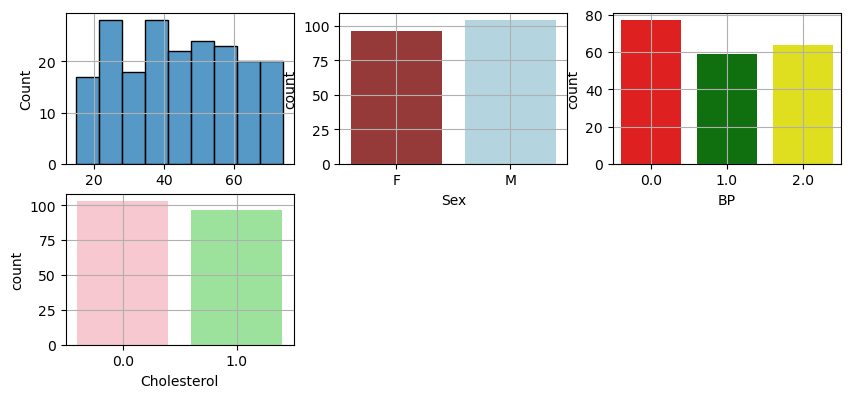

In [145]:
plt.figure(figsize=(10,9))
plt.subplot(4,3,1)
sns.histplot(x=df['Age'],data=df)
plt.grid(linestyle='-')

plt.subplot(4,3,2)
c=df['Sex'].value_counts()
sns.countplot(df,x='Sex',palette=['brown','lightblue'])
plt.grid(linestyle='-')

plt.subplot(4,3,3)
sns.countplot(x=df['BP'],data=df,palette=['red','green','yellow'])
plt.grid(linestyle='-')

plt.subplot(4,3,4)
sns.countplot(df,x='Cholesterol',palette=['pink','lightgreen'])
plt.grid(linestyle='-')

plt.show()

# Feature scaling

In [150]:
ordinalencoding=oe(categories=[['HIGH','NORMAL','LOW']])
df['BP']=ordinalencoding.fit_transform(df[['BP']])

In [149]:
df['Cholesterol']=ordinalencoding.fit_transform(df[['Cholesterol']])

In [158]:
oee=oe()
df[['Drug']]=oee.fit_transform(df[['Drug']])

In [194]:
le=LE()
df['Sex']=le.fit_transform(df['Sex'])

In [195]:
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0.0,0.0,25.355,4.0
1,47,1,2.0,0.0,13.093,2.0
2,47,1,2.0,0.0,10.114,2.0
3,28,0,1.0,0.0,7.798,3.0
4,61,0,2.0,0.0,18.043,4.0


# Declare feature vector and target variable

In [205]:
y=df['Drug']
x=df.drop(['Drug'],axis=1)

In [206]:
y.head(10)

0    4.0
1    2.0
2    2.0
3    3.0
4    4.0
5    3.0
6    4.0
7    2.0
8    4.0
9    4.0
Name: Drug, dtype: float64

# Split data into separate training and test set

In [231]:
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.2, random_state=0)

# Model training

In [235]:
model = DecisionTreeClassifier(criterion="entropy", random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

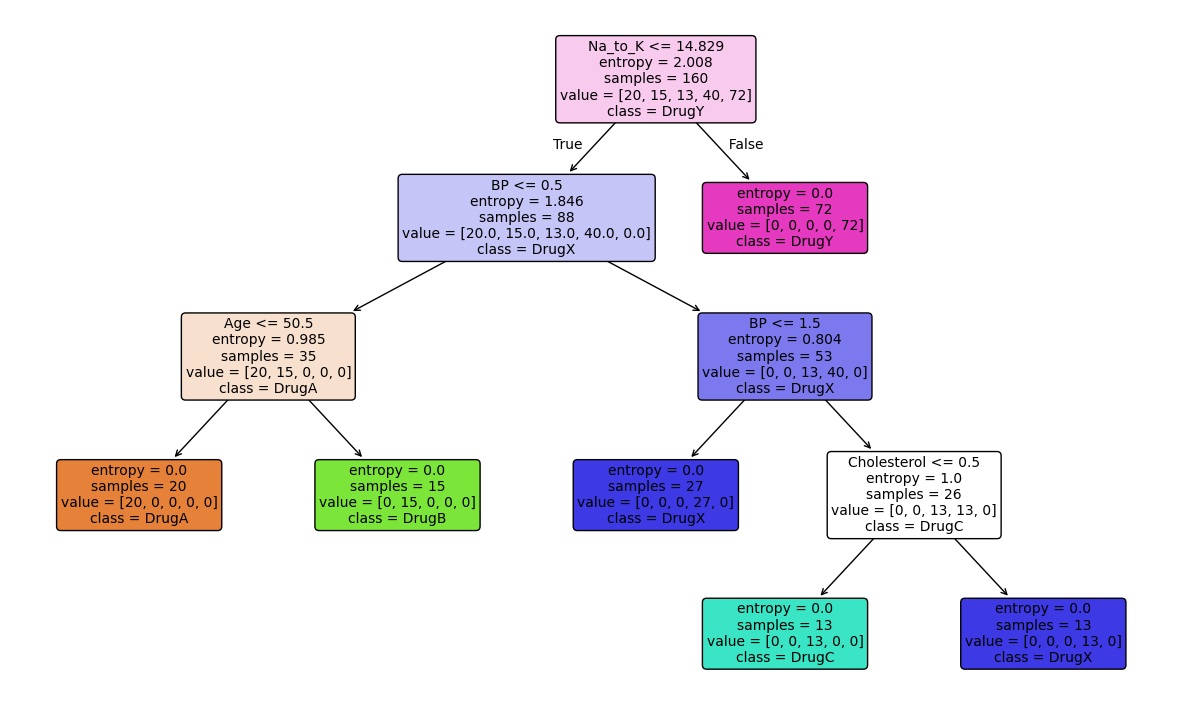

In [287]:
labels = ["DrugA", "DrugB", "DrugC", "DrugX", "DrugY"] 
plt.figure(figsize=(15,9))
plot_tree(model,feature_names=x.columns,class_names=labels, filled=True, rounded=True)
plt.show()

# Predict results 

In [280]:
ypred_test=model.predict(x_test)

In [281]:
ypred_test

array([2., 3., 4., 4., 4., 3., 3., 3., 4., 3., 0., 4., 4., 4., 1., 2., 4.,
       4., 3., 4., 4., 3., 3., 3., 4., 4., 4., 4., 4., 3., 3., 2., 0., 3.,
       4., 4., 3., 4., 0., 3.])

# checking accuracy

In [285]:
print("Accuracy:", accuracy_score(y_test, ypred_test))
print("--"*30)
print("Classification Report:\n", classification_report(y_test, ypred_test))
print("--"*30)
print("Confusion Matrix:\n", confusion_matrix(y_test, ypred_test))

Accuracy: 1.0
------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00         3
         3.0       1.00      1.00      1.00        14
         4.0       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

------------------------------------------------------------
Confusion Matrix:
 [[ 3  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0 19]]


<Axes: >

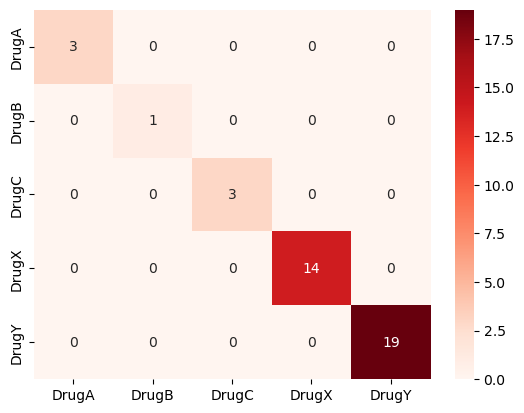

In [261]:
labels = ["DrugA", "DrugB", "DrugC", "DrugX", "DrugY"] 
sns.heatmap(cm,cmap='Reds',annot=True,fmt='d',xticklabels=labels,yticklabels=labels)